In [1]:
install.packages('rJava')


package 'rJava' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpGWvJ8I\downloaded_packages


In [2]:
install.packages('multilinguer')

package 'multilinguer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpGWvJ8I\downloaded_packages


In [3]:
install.packages(c('stringr','hash','tau','Sejong','RSQLite','devtools',
                  type='binary'))

Warning message:
"package 'binary' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
'plogr'(들)을 또한 설치합니다.




package 'plogr' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'hash' successfully unpacked and MD5 sums checked
package 'tau' successfully unpacked and MD5 sums checked
package 'Sejong' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpGWvJ8I\downloaded_packages


In [4]:
install.packages('remotes')


package 'remotes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpGWvJ8I\downloaded_packages


In [5]:
remotes::install_github('haven-jeon/KoNLP'
                       ,upgrade='never'
                       ,INSTALL_opts=c('--no-multiarch'))

Skipping install of 'KoNLP' from a github remote, the SHA1 (960fbbcf) has not changed since last install.
  Use `force = TRUE` to force installation



In [6]:
library(KoNLP)

In [7]:
useNIADic()

Backup was just finished!
1213109 words dictionary was built.


In [8]:
txt <- readLines('./president-youn.txt', encoding="UTF-8")

Warning message in readLines("./president-youn.txt", encoding = "UTF-8"):
"'./president-youn.txt'에서 불완전한 마지막 행이 발견되었습니다"


In [10]:
head(txt)


[1] "존경하고 사랑하는 국민 여러분,"                                                                                                                                                                 
[2] "750만 재외동포 여러분,"                                                                                                                                                                         
[3] "그리고 자유를 사랑하는 세계 시민 여러분,"                                                                                                                                                       
[4] ""                                                                                                                                                                                               
[5] "저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다."
[6] ""

In [11]:
install.packages('stringr')

package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpGQ5ahj\downloaded_packages


In [12]:
library(stringr)
library(dplyr)



다음의 패키지를 부착합니다: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [13]:
txt  <- str_replace_all(txt, '\\W',' ')

In [14]:
extractNoun('대한민국의 영토는 한반도와 그 부속도서로 한다')

[1] "대한민국" "영토"     "한반도"   "부속도서" "한"

In [15]:
nouns <- extractNoun(txt)

In [16]:
# 추출한 명사 list 를 문자열 벡터로 변환, 단어별 빈도표 생성
wordcount <- table(unlist(nouns))

In [17]:
df_word <- as.data.frame(wordcount)

In [18]:
df_word <- rename(df_word, word=Var1, freq=Freq)

In [19]:
df_word <- filter(df_word, str_length(word) >= 2)
df_word

word,freq
<fct>,<int>
10,1
750,1
가능,3
가치,7
각국,1
각자,1
갈등,4
감내,1
감사,2


In [20]:
top_20 <- df_word %>% 
    arrange(desc(freq)) %>% 
    head(20)

In [21]:
top_20

,word,freq
,<fct>,<int>
1,자유,35
2,국민,15
3,시민,15
4,우리,14
5,세계,13
6,사회,12
7,평화,12
8,국제,9
9,있습니,9


In [22]:
install.packages('wordcloud')

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpGQ5ahj\downloaded_packages


In [23]:
library(wordcloud)

필요한 패키지를 로딩중입니다: RColorBrewer



In [24]:
library(RColorBrewer)


In [25]:
pal <- brewer.pal(8, 'Dark2')


In [26]:
set.seed(1234)

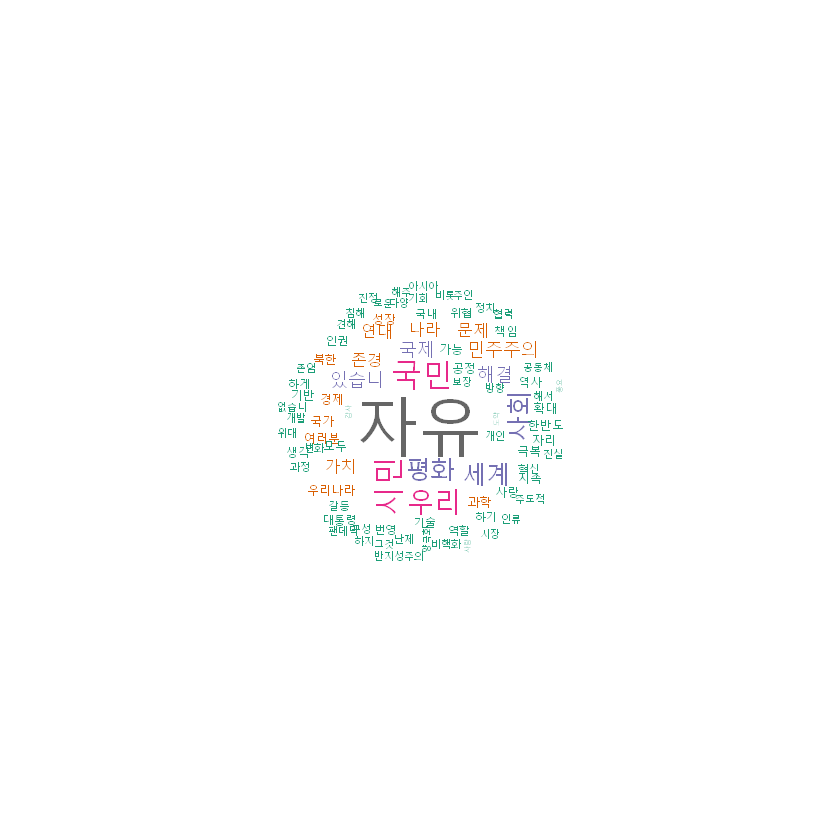

In [27]:
wordcloud(words = df_word$word,
          freq = df_word$freq,
          min.freq = 2,
          max.words = 200,
          random.order = F,
          rot.per = .1,
          scale = c(4, 0.3),
          colors = pal          
         )